# Introduction

https://www.kaggle.com/gunner38/horseracing?select=tips.csv

Horse Racing - Tipster Bets
1. [Horse Racing Tipster Bets dataset](#0.Horse-Racing-Tipster-Bets-dataset)
2. [Data Processing]

## 1. Horse Racing Tipster Bets dataset:

It contains 39000 instances and 10 columns.

In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import scipy.stats as stats
import researchpy as rp

## 2. Data Processing:

**Load and Visualise data**

In [2]:
df = pd.read_csv('tips.csv', encoding='latin1')
df.head()

,UID,ID,Tipster,Date,Track,Horse,Bet Type,Odds,Result,TipsterActive
0,1,1,Tipster A,24/7/2015,Ascot,Fredricka,Win,8.00,Lose,True
1,2,2,Tipster A,24/7/2015,Thirsk,Spend A Penny,Win,4.50,Lose,True
2,3,3,Tipster A,24/7/2015,York,Straightothepoint,Win,7.00,Lose,True
3,4,4,Tipster A,24/7/2015,Newmarket,Miss Inga Sock,Win,5.00,Lose,True
4,5,5,Tipster A,25/7/2015,Ascot,Peril,Win,4.33,Win,True


In [4]:
df.dtypes

UID                int64
ID                 int64
Tipster           object
Date              object
Track             object
Horse             object
Bet Type          object
Odds             float64
Result            object
TipsterActive       bool
dtype: object

In [22]:
df['Odds'].describe()

count    38248.000000
mean        10.994968
std         11.004589
min          1.070000
25%          5.000000
50%          8.000000
75%         13.000000
max        407.000000
Name: Odds, dtype: float64

As the histogram below you can see that Tipster E has the highest winrate

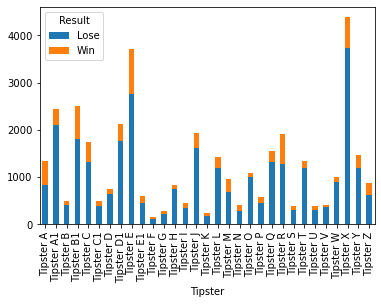

In [29]:
df.groupby(['Tipster','Result']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

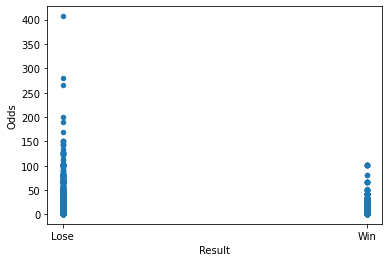

In [5]:
df.plot(kind = 'scatter', x = 'Result', y = 'Odds')
plt.show()

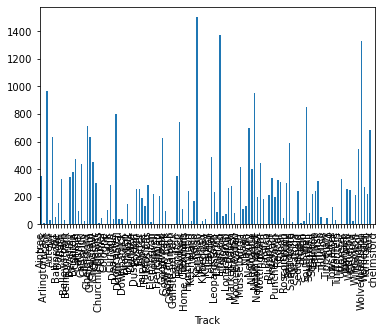

In [13]:
df.groupby('Track')['Horse'].nunique().plot(kind='bar')
plt.show()

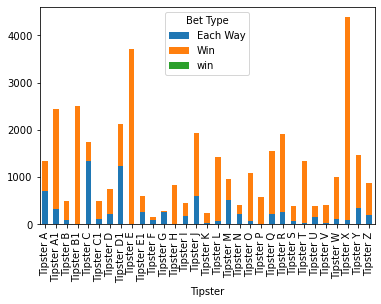

In [17]:
df.groupby(['Tipster','Bet Type']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

KeyError: 'Tipster Active'

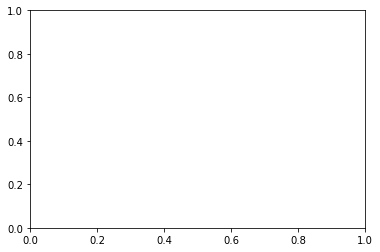

In [7]:
df.plot(kind = 'scatter', x = 'Tipster', y = 'Tipster Active')
plt.show()

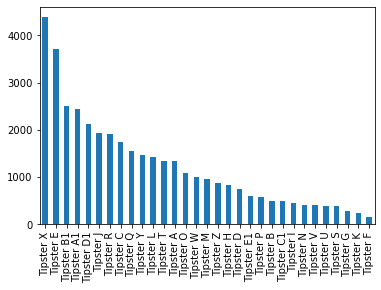

In [5]:
df['Tipster'].value_counts().plot.bar()

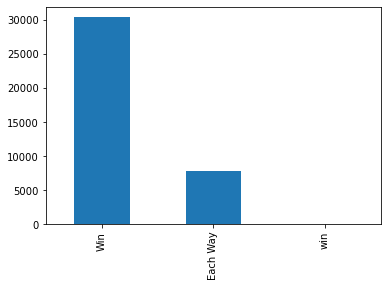

In [46]:
df['Bet Type'].value_counts().plot.bar()

In [39]:
df.isnull().any()

UID              False
ID               False
Tipster          False
Date             False
Track            False
Horse            False
Bet Type         False
Odds             False
Result           False
TipsterActive    False
dtype: bool

In [40]:
All = df.shape[0]
result_win =
result_lose = df[df['Result'] == 'Lose']
bet_win = df[df['Bet Type'] == 'Win']
bet_both = df[df['Bet Type'] == 'Each Way']

rs_x = len(result_win)/All
rs_y = len(result_lose)/All
bt_x = len(bet_win)/All
bt_y = len(bet_both)/All

print('win: ', rs_x*100,'%')
print('lose: ', rs_y*100,'%')

print('win: ', bt_x*100,'%')
print('lose: ', bt_y*100,'%')

win:  20.087324827441957 %
lose:  79.91267517255804 %
win:  79.52572683539009 %
lose:  20.471658648818238 %


**There are total 31 Tipsters**

Tipster X is the most active Tipster

In [41]:
A = df.Tipster.value_counts()
print(A)
len(A)

Tipster X     4383
Tipster E     3700
Tipster B1    2497
Tipster A1    2446
Tipster D1    2119
Tipster J     1937
Tipster R     1901
Tipster C     1738
Tipster Q     1552
Tipster Y     1469
Tipster L     1425
Tipster T     1332
Tipster A     1331
Tipster O     1094
Tipster W      994
Tipster M      957
Tipster Z      883
Tipster H      833
Tipster D      741
Tipster E1     609
Tipster P      581
Tipster B      503
Tipster C1     501
Tipster I      453
Tipster N      415
Tipster V      406
Tipster U      383
Tipster S      383
Tipster G      290
Tipster K      246
Tipster F      146
Name: Tipster, dtype: int64


31

From the code below you can see that there are only 19 Active Tipsters.

In [22]:
Active = df.groupby('Tipster')['TipsterActive'].apply(lambda x: x[x == True].count())
#print(Active)
print((Active > 0).value_counts())
#chart = pd.DataFrame(Active)
#chart.plot.pie(y='TipsterActive', figsize = (12,7))

True     19
False    12
Name: TipsterActive, dtype: int64


In [3]:
crosstab = pd.crosstab(df['Tipster'], df['Result'])
crosstab

Result,Lose,Win
Tipster,,
Tipster A,839,492
Tipster A1,2107,339
Tipster B,417,86
Tipster B1,1812,685
Tipster C,1312,426
Tipster C1,392,109
Tipster D,645,96
Tipster D1,1771,348
Tipster E,2761,939


In [4]:
stats.chi2_contingency(crosstab)

(1282.276496268062,
 8.388512226737298e-251,
 30,
 array([[1063.63770655,  267.36229345],
        [1954.66403472,  491.33596528],
        [ 401.96075612,  101.03924388],
        [1995.41949906,  501.58050094],
        [1388.8822945 ,  349.1177055 ],
        [ 400.36250261,  100.63749739],
        [ 592.15292303,  148.84707697],
        [1693.34958691,  425.65041309],
        [2956.76898138,  743.23101862],
        [ 486.6681918 ,  122.3318082 ],
        [ 116.67250575,   29.32749425],
        [ 231.746758  ,   58.253242  ],
        [ 665.67258419,  167.32741581],
        [ 362.00441853,   90.99558147],
        [1547.90851809,  389.09148191],
        [ 196.58518092,   49.41481908],
        [1138.75562121,  286.24437879],
        [ 764.7643014 ,  192.2356986 ],
        [ 331.63760197,   83.36239803],
        [ 874.24466639,  219.75533361],
        [ 464.29264275,  116.70735725],
        [1240.24471868,  311.75528132],
        [1519.13995503,  381.86004497],
        [ 306.06554591,   76.9

In [4]:
crosstab, test_results, expected = rp.crosstab(df["Tipster"], df["Result"],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")

crosstab

Result               
Result       Lose    Win     All
Tipster                         
Tipster A    2.19   1.29    3.48
Tipster A1   5.51   0.89    6.40
Tipster B    1.09   0.22    1.32
Tipster B1   4.74   1.79    6.53
Tipster C    3.43   1.11    4.54
Tipster C1   1.02   0.28    1.31
Tipster D    1.69   0.25    1.94
Tipster D1   4.63   0.91    5.54
Tipster E    7.22   2.46    9.67
Tipster E1   1.17   0.42    1.59
Tipster F    0.27   0.11    0.38
Tipster G    0.59   0.17    0.76
Tipster H    1.95   0.23    2.18
Tipster I    0.90   0.28    1.18
Tipster J    4.24   0.83    5.06
Tipster K    0.47   0.17    0.64
Tipster L    3.11   0.62    3.73
Tipster M    1.81   0.69    2.50
Tipster N    0.76   0.33    1.09
Tipster O    2.63   0.23    2.86
Tipster P    1.20   0.32    1.52
Tipster Q    3.43   0.63    4.06
Tipster R    3.34   1.63    4.97
Tipster S    0.79   0.21    1.00
Tipster T    3.11   0.37    3.48
Tipster U    0.80   0.20    1.00
Tipster V    0.96   0.10    1.06
Tipster W    2.33   0.27    2.60
Tipster X    9.78   1.68   11.46
Tipster Y    3.10   0.75    3.84
Tipster Z    1.63   0.68    2.31
All         79.91  20.09  100.00

In [5]:
test_results

,Chi-square test,results
0,Pearson Chi-square ( 30.0) =,1282.2765
1,p-value =,0.0000
2,Cramer's V =,0.1831


In [7]:
crosstab, test_results, expected = rp.crosstab(df["Tipster"], df["TipsterActive"],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")

crosstab

TipsterActive               
TipsterActive         False   True     All
Tipster                                   
Tipster A              0.00   3.48    3.48
Tipster A1             0.00   6.40    6.40
Tipster B              0.00   1.32    1.32
Tipster B1             6.53   0.00    6.53
Tipster C              4.54   0.00    4.54
Tipster C1             1.31   0.00    1.31
Tipster D              0.00   1.94    1.94
Tipster D1             0.00   5.54    5.54
Tipster E              0.00   9.67    9.67
Tipster E1             1.59   0.00    1.59
Tipster F              0.38   0.00    0.38
Tipster G              0.00   0.76    0.76
Tipster H              2.18   0.00    2.18
Tipster I              0.00   1.18    1.18
Tipster J              0.00   5.06    5.06
Tipster K              0.00   0.64    0.64
Tipster L              3.73   0.00    3.73
Tipster M              0.00   2.50    2.50
Tipster N              1.09   0.00    1.09
Tipster O              0.00   2.86    2.86
Tipster P              0.00   1.52    1.52
Tipster Q              4.06   0.00    4.06
Tipster R              0.00   4.97    4.97
Tipster S              0.00   1.00    1.00
Tipster T              0.00   3.48    3.48
Tipster U              0.00   1.00    1.00
Tipster V              0.00   1.06    1.06
Tipster W              2.60   0.00    2.60
Tipster X              0.00  11.46   11.46
Tipster Y              3.84   0.00    3.84
Tipster Z              2.31   0.00    2.31
All                   34.15  65.85  100.00

In [8]:
test_results

,Chi-square test,results
0,Pearson Chi-square ( 30.0) =,38248.0
1,p-value =,0.0
2,Cramer's V =,1.0


In [11]:
crosstab, test_results, expected = rp.crosstab(df["Tipster"], df["Bet Type"],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")

crosstab

Bet Type                    
Bet Type   Each Way    Win  win     All
Tipster                                
Tipster A      1.85   1.63  0.0    3.48
Tipster A1     0.83   5.56  0.0    6.40
Tipster B      0.25   1.07  0.0    1.32
Tipster B1     0.01   6.52  0.0    6.53
Tipster C      3.51   1.03  0.0    4.54
Tipster C1     0.32   0.99  0.0    1.31
Tipster D      0.58   1.35  0.0    1.94
Tipster D1     3.22   2.32  0.0    5.54
Tipster E      0.02   9.66  0.0    9.67
Tipster E1     0.65   0.94  0.0    1.59
Tipster F      0.26   0.12  0.0    0.38
Tipster G      0.66   0.10  0.0    0.76
Tipster H      0.00   2.18  0.0    2.18
Tipster I      0.48   0.71  0.0    1.18
Tipster J      1.58   3.49  0.0    5.06
Tipster K      0.06   0.58  0.0    0.64
Tipster L      0.17   3.55  0.0    3.73
Tipster M      1.36   1.14  0.0    2.50
Tipster N      0.56   0.53  0.0    1.09
Tipster O      0.17   2.69  0.0    2.86
Tipster P      0.00   1.52  0.0    1.52
Tipster Q      0.56   3.50  0.0    4.06
Tipster R      0.69   4.29  0.0    4.97
Tipster S      0.20   0.80  0.0    1.00
Tipster T      0.09   3.39  0.0    3.48
Tipster U      0.40   0.60  0.0    1.00
Tipster V      0.06   1.00  0.0    1.06
Tipster W      0.27   2.33  0.0    2.60
Tipster X      0.24  11.22  0.0   11.46
Tipster Y      0.89   2.95  0.0    3.84
Tipster Z      0.54   1.77  0.0    2.31
All           20.47  79.53  0.0  100.00

In [12]:
test_results

,Chi-square test,results
0,Pearson Chi-square ( 60.0) =,12445.6992
1,p-value =,0.0000
2,Cramer's V =,0.4034


In [13]:
crosstab, test_results, expected = rp.crosstab(df["Horse"], df["Track"],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")

crosstab

Track                                                \
Track              Aintree Arlington Park Ascot Auteuil   Ayr Ballinrobe   
Horse                                                                      
A Bold Move           0.00           0.00  0.00    0.00  0.00       0.00   
A Boy Named Sue       0.00           0.00  0.00    0.00  0.00       0.00   
A Boy Named Suzi      0.00           0.00  0.00    0.00  0.00       0.00   
A Bus Named Desire    0.00           0.00  0.00    0.00  0.00       0.00   
A Doll In Milan       0.00           0.00  0.00    0.00  0.00       0.00   
...                    ...            ...   ...     ...   ...        ...   
on-dee Valrene        0.00           0.00  0.00    0.00  0.00       0.00   
s Royal Artillery     0.00           0.00  0.00    0.00  0.00       0.00   
y Dominada            0.00           0.00  0.00    0.00  0.00       0.00   
y Looking Good        0.00           0.00  0.00    0.00  0.00       0.00   
All                   1.34           0.04  3.54    0.12  2.31       0.14   

                                                          ...           \
Track              Bangor  Bath Bellewstown Belmont Park  ... Wetherby   
Horse                                                     ...            
A Bold Move           0.0  0.00        0.00         0.00  ...     0.00   
A Boy Named Sue       0.0  0.00        0.00         0.00  ...     0.00   
A Boy Named Suzi      0.0  0.00        0.00         0.00  ...     0.00   
A Bus Named Desire    0.0  0.00        0.00         0.00  ...     0.00   
A Doll In Milan       0.0  0.00        0.00         0.00  ...     0.00   
...                   ...   ...         ...          ...  ...      ...   
on-dee Valrene        0.0  0.00        0.00         0.00  ...     0.00   
s Royal Artillery     0.0  0.00        0.00         0.00  ...     0.00   
y Dominada            0.0  0.00        0.00         0.00  ...     0.00   
y Looking Good        0.0  0.00        0.00         0.00  ...     0.00   
All                   0.5  1.06        0.14         0.01  ...     0.76   

                                                                               \
Track              Wexford Wincanton Windsor Wolverhampton Worcester Yarmouth   
Horse                                                                           
A Bold Move           0.00       0.0    0.00          0.00      0.00     0.00   
A Boy Named Sue       0.00       0.0    0.00          0.00      0.00     0.00   
A Boy Named Suzi      0.00       0.0    0.00          0.00      0.00     0.00   
A Bus Named Desire    0.00       0.0    0.00          0.00      0.00     0.00   
A Doll In Milan       0.00       0.0    0.00          0.00      0.00     0.00   
...                    ...       ...     ...           ...       ...      ...   
on-dee Valrene        0.00       0.0    0.00          0.00      0.00     0.00   
s Royal Artillery     0.00       0.0    0.00          0.00      0.00     0.00   
y Dominada            0.00       0.0    0.00          0.00      0.00     0.00   
y Looking Good        0.00       0.0    0.00          0.00      0.00     0.00   
All                   0.05       0.7    1.78          5.52      0.88     0.69   

                                             
Track               York chelmsford     All  
Horse                                        
A Bold Move         0.00       0.00    0.00  
A Boy Named Sue     0.00       0.00    0.00  
A Boy Named Suzi    0.00       0.00    0.01  
A Bus Named Desire  0.00       0.00    0.01  
A Doll In Milan     0.00       0.00    0.00  
...                  ...        ...     ...  
on-dee Valrene      0.00       0.00    0.00  
s Royal Artillery   0.00       0.00    0.00  
y Dominada          0.00       0.00    0.00  
y Looking Good      0.00       0.00    0.00  
All                 2.66       0.01  100.00  

[15792 rows x 117 columns]

In [15]:
test_results

,Chi-square test,results
0,Pearson Chi-square ( 1815850.0) =,2.707500e+06
1,p-value =,0.000000e+00
2,Cramer's V =,7.846000e-01


In [16]:
crosstab, test_results, expected = rp.crosstab(df["TipsterActive"], df["Result"],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")

crosstab

Result               
Result          Lose    Win     All
TipsterActive                      
False          26.94   7.21   34.15
True           52.97  12.88   65.85
All            79.91  20.09  100.00

In [17]:
test_results

,Chi-square test,results
0,Pearson Chi-square ( 1.0) =,13.0427
1,p-value =,0.0003
2,Cramer's phi =,0.0185


In [ ]:
crosstab, test_results, expected = rp.crosstab(df["Horse"], df["Track"],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")

crosstab

In [1]:
dsadsadsadASDA

NameError: name 'dsadsadsadASDA' is not defined